In [1]:
%matplotlib inline
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('chembl_5HT.csv')
df = df.dropna()

In [3]:
df.head(2)

,standard_relation,standard_value,standard_type,pchembl_value,assay_chembl_id,target_chembl_id,canonical_smiles,compound_chembl_id
1,=,168.0,Ki,6.78,CHEMBL615460,CHEMBL214,CCCN(CCC)[C@@H]1CCc2c(OC)cccc2[C@@H]1C,CHEMBL278751
2,=,181.0,Ki,6.74,CHEMBL615809,CHEMBL214,C(N1CCN(CC1)c2ncccn2)c3c[nH]c(n3)c4ccccc4,CHEMBL103772


In [4]:
# define class pIC50 >8 is active and other is inactive.
df['CLS'] = np.array(df.pchembl_value > 9, dtype=np.int)

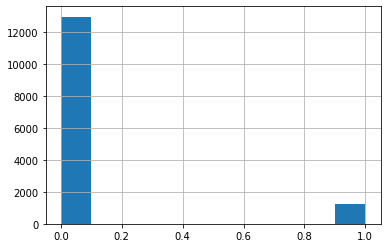

In [5]:
pd.plotting.hist_series(df.CLS)

In [6]:
mols = [Chem.MolFromSmiles(smi) for smi in df.canonical_smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in mols]

In [7]:
def fp2np(fp):
    arr = np.zeros((0,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [8]:
X = np.array([fp2np(fp) for fp in fps])

In [9]:
Y = df.CLS.to_numpy()

In [10]:
# without sampling
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=123, test_size=0.2)

In [11]:
print(train_X.shape)
print(train_Y.shape)
print(sum(train_Y)/len(train_Y))

(11340, 2048)
(11340,)
0.08686067019400352


In [12]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_X, train_Y)
pred_Y = rf.predict(test_X)

In [13]:
clsreport = classification_report(test_Y, pred_Y)

In [14]:
print(clsreport)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      2586
           1       0.57      0.39      0.46       250

    accuracy                           0.92      2836
   macro avg       0.75      0.68      0.71      2836
weighted avg       0.91      0.92      0.91      2836



In [15]:
X_resampled, Y_resampled = SMOTE().fit_resample(train_X, train_Y)

In [16]:
print(X_resampled.shape)
print(Y_resampled.shape)
print(sum(Y_resampled)/len(Y_resampled))

(20710, 2048)
(20710,)
0.5


In [17]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_resampled, Y_resampled)
pred_Y = rf.predict(test_X)

In [18]:
clsreport = classification_report(test_Y, pred_Y)
print(clsreport)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2586
           1       0.47      0.47      0.47       250

    accuracy                           0.91      2836
   macro avg       0.71      0.71      0.71      2836
weighted avg       0.91      0.91      0.91      2836



In [19]:
X_resampled, Y_resampled = ADASYN().fit_resample(train_X, train_Y)

In [20]:
print(X_resampled.shape)
print(Y_resampled.shape)
print(sum(Y_resampled)/len(Y_resampled))

(20884, 2048)
(20884,)
0.5041658686075464


In [21]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_resampled, Y_resampled)
pred_Y = rf.predict(test_X)
clsreport = classification_report(test_Y, pred_Y)
print(clsreport)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2586
           1       0.47      0.49      0.48       250

    accuracy                           0.91      2836
   macro avg       0.71      0.72      0.72      2836
weighted avg       0.91      0.91      0.91      2836



In [22]:
pca = PCA(n_components=3)

In [23]:
res = pca.fit_transform(X)

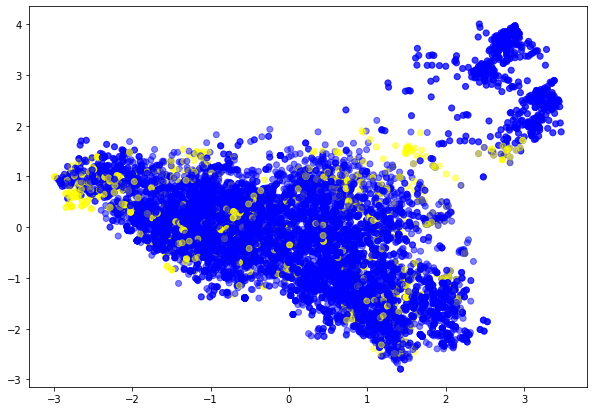

In [24]:
col = {0:'blue', 1:'yellow'}
color = [col[np.int(i)] for i in Y]
plt.figure(figsize=(10,7))
plt.scatter(res[:,0], res[:,1], c=color, alpha=0.5)